

# Quantum "Hello World!": Superposition and Measurement

## Write and execute a real quantum algorithm!

### We will create a **superposition state** using the **Hadamard** gate and then observe the resulting qubit state.  



## First step: Create a program

The first step towards creating a quantum circuit in myQLM is to create a variable that will hold a corresponding **program**.
This is done by:

+ importing the functions from **qat.lang.AQASM** -library
+ creating a program instance

The following cell imports the functions from qat.lang.AQASM:

In [1]:
from qat.lang.AQASM import * # the asterisk '*' imports all functions from the library

Now we can create a **program object**.

To do so you need:
+ to define a name for the variable of your program
+ to call from the AQASM library the function **Program**


In [2]:
prog = Program()

## Second step: Allocate the qubits


We need **only one** qubit in our program.

We need to:
+ define the name for our register of qubits
+ call the function **qalloc** ("qubit allocate") on our program
+ define the number of qubits we want

The following cell allocates (creates) one qubit to our program:

In [3]:
qbits = prog.qalloc(1)  

## Third step: Applying gates

Now, we can have access to our qubit using the name of the register.

Registers behave like python list/arrays, for example if you named your register QUBIT_REGISTER:
+ QUBIT_REGISTER[0] is the first qubit.
+ QUBIT_REGISTER[1] is the second qubit.

To **create a superposition**, we simply need to **apply** the Hadamard gate to the qubit:
To do so we need to:
+ specify on which program we wish to apply our gate
+ specify the gate we wish to apply
+ specify the name of the qubit register we wish to apply the gate
+ specify the index of the qubit inside the register

The following cell applies the Hadamard gate (**H**) to the first (and in this case only) qubit in the register:

In [4]:
prog.apply(H, qbits[0]) 

We have a program where Hadamard gate is applied to one qubit.

We now need to create the **quantum circuit** associated with this program.

## Fourth step: Create and visualize the circuit

MyQLM (and QLM) is based on an object called a **circuit**.

Once a program is created it is possible to generate the circuit from it.

A circuit can therefore be:
+ executed
+ optimized
+ used to create other circuits

To create your circuit you will need to:
+ define the name of your cicuit
+ call the function **to_circ** on your program

The following cell creates a circuit based on our program:

In [5]:
circuit = prog.to_circ()

Now that we have a proper circuit, we can vizualize it using:
+ %qatdisplay CIRCUIT_NAME

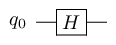

In [6]:
%qatdisplay circuit

The circuit vizualisation is a useful tool to quickly verify if the implementation of a program went well.

## Fifth step: Execute and measure the circuit

We now have a circuit object. This circuit can be made into a **job** that can be executed by a 'quantum processing unit', *i.e.*, a **QPU**. In QLM the QPU is a classical simulator that *mimics a real physical QPU*. It does this by keeping track of all the possible qubit states and their evolution. This requires a lot of memory and is in general possible only for a small number of qubits (< 50).

To create a job we need to:
+ define the name for our job
+ call the method **to_job** on a circuit

First, we will call to_job without any parameters:


In [7]:
job1 = circuit.to_job()

The arguments given to the to_job() method define the kind information we want to extract from our qubits after the circuit is executed. More precisely, whether we want to **emulate measurement** or take advantage of the fact that we are only simulating one, and thus have information of the **full distribution of states**. Giving no arguments as in the previous cell, defaults to the latter case, full distribution.

**In reality**, when measuring physical qubits one observes only definite values corresponding to zeros and ones; the *probability amplitudes* describing the quantum state cannot be measured! 

To simulate this in pyAQASM, we need to give the circuit.to_job() method an argument: **nbshots**, and set it to equal the number of times we want to execute and measure the circuit. The following cell creates a job that corresponds to emulating 5 repeated measurements. 

In [ ]:
job2 = circuit.to_job(nbshots = 5)

To make a simulation with our job on a QLM we need to submit it to a QPU.

To do so we first need to:
+ import the function PyLinalg from qat.pylinalg
+ create a QPU by calling PyLinalg()

In [ ]:
from qat.pylinalg import PyLinalg  
qpu = PyLinalg() # PyLinalg comes from Python Linear algebra - the method used to simulate quantum mechanics

We can now submit the job to our simulator.

To do so we need to use the function **submit** on our QPU and pass our job as a parameter. The output will be stored in the **result** object:

In [ ]:
result1 = qpu.submit(job1) # results of the 'full distribution' job 

result2 = qpu.submit(job2) # results of the 'measurement emulation' job

## Sixth step: Read out the result

The result object is an array of **samples**. Samples hold information of the qubit register after the execution. The type of information depends again on the job that was submitted. Let us look at the two cases:
+ **full distribution**: samples hold probability amplitudes (and probabilities) of each possible state
+ **measurement emulation**: samples hold statistical probabilities of states, calculated from repeated measurements

The samples are conveniently accessed using a *for loop*. The following cell displays the result from the evaluation of the *full distribution* job, job1:

In [ ]:
for sample in result1:
    print("state:", sample.state, "probability amplitude:", sample.amplitude, "probability:", sample.probability, )

We see that the qubit is in an equal superposition of 0 and 1. Measuring the qubit would give |0> with 50% and |1> with 50%. 

Note that probabilities are connected to probability amplitudes by $P_\alpha=|\alpha|^2$, where $\alpha$ is a probability amplitude of a state and $P_\alpha$ is probability that this state is observed in a measurement.

Finally, let us look at the result of the job that emulated 5 repeated measurements. 

In [ ]:
for sample in result2:
    print("state:", sample.state, "probability amplitude:", sample.amplitude, "probability:", sample.probability)


Now, just like with real world quantum systems, the probability amplitudes of the states are unknown. The result consists of the statistical probabilities obtained from 5 repeated measurements.

You can try changing the number of shots below, to see its effect on the probabilities:

In [ ]:
job3 = circuit.to_job(nbshots = 42)

result3 = qpu.submit(job3)

for sample in result3:
    print("state:", sample.state, "probability:", sample.probability)

## Real world application: true random numbers

Since the outcomes of quantum system's measurements are **fundamentally random**, they can be utilized in production of truly random numbers (as opposed to quasi-random numbers, whose patterns can be predicted with enough information).   

We review one more argument of the .to_job method that enables neat printing of our 'true random numbers'. 

By default the results of a job are **aggregated**. This means that if we launch measurements for example 100 times (nbshots=100), repeating outcomes are stored under one label along with the number they repeated (this is how we get and approximation for the probability of each outcome).

It is possible to create a job *without* aggregating the results by using the argument **aggregate_data=False** in the to_job method. 

In [ ]:
# Create a job where we specify the number of shots and disable the aggregation of measurement outcomes
job4 = circuit.to_job(nbshots=10, aggregate_data=False)

# Submit to the QPU
result4 = qpu.submit(job4)

# And use it to draw 10 samples
for sample in result4:
    print("We measured the state", sample.state)

As you can see, the only information we are getting are the states of each execution.

Let's modify the printing a little to get nice looking random number sequences:

In [ ]:
## we use the underscore '_' in front of 'state' to print without ket notation
##  and include the argument end = " " to print the results in one line
for sample in result4:
    print(sample._state, end = " ") 

### Note!
On some versions of myQLM, the underscore syntax gives an AttributeError. In this case, you can use the python .translate construct instead:

In [ ]:
## we use the underscore '_' in front of 'state' to print without ket notation
##  and include the argument end = " " to print the results in one line
for sample in result4:
    print(str(sample.state).translate(str.maketrans({'|': None, '>': None})), end = " ")

## Takeaway

We have seen how to:
+ create a program
+ allocate some qubits
+ apply gates
+ generate a circuit
+ create a job (full distribution or measurement emulation. Aggregate data or not)
+ submit a job
+ display the result